[View in Colaboratory](https://colab.research.google.com/github/Ruturaj123/Cifar10-Keras/blob/master/Cifar10.ipynb)

In [0]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from scipy.misc import toimage

np.random.seed(2)

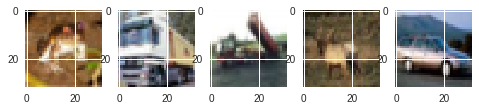

In [38]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(5):
	plt.subplot(150 + 1 + i)
	plt.imshow(toimage(X_train[i]))
plt.show()

In [0]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_of_classes = y_test.shape[1]

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_of_classes, activation='softmax'))

In [0]:
epochs = 50
learning_rate = 0.01

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.005, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
__________

In [47]:
model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=epochs, callbacks=[reduce_lr])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 36s 723us/step - loss: 0.6881 - acc: 0.7626 - val_loss: 0.5820 - val_acc: 0.8056
Epoch 2/50
50000/50000 [==============================] - 28s 570us/step - loss: 0.5931 - acc: 0.7953 - val_loss: 0.5536 - val_acc: 0.8108
Epoch 3/50
50000/50000 [==============================] - 28s 568us/step - loss: 0.5551 - acc: 0.8065 - val_loss: 0.6202 - val_acc: 0.7937
Epoch 4/50
50000/50000 [==============================] - 29s 570us/step - loss: 0.5259 - acc: 0.8171 - val_loss: 0.5299 - val_acc: 0.8230
Epoch 5/50
50000/50000 [==============================] - 28s 568us/step - loss: 0.5040 - acc: 0.8241 - val_loss: 0.5347 - val_acc: 0.8221
Epoch 6/50
50000/50000 [==============================] - 28s 567us/step - loss: 0.4834 - acc: 0.8313 - val_loss: 0.5585 - val_acc: 0.8182
Epoch 7/50
50000/50000 [==============================] - 28s 568us/step - loss: 0.4675 - acc: 0.8374 - val_loss: 0.

In [48]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.08%
